In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import
import pandas as pd
import numpy as np
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                            BaggingClassifier, BaggingRegressor, \
                            GradientBoostingRegressor, GradientBoostingClassifier

import sklearn.linear_model as sklm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

import sklearn.linear_model as sklm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 70.5 MB/s eta 0:00:00
Colab environment detected.


In [ ]:
# Read in Data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cleaned_Students_Performance.csv")

In [ ]:
# Check to see if the data is displaying properly
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


In [ ]:
required_variables = ["group A", "group B", "group C", "group D", "group E"]
df_variables = df[df["race_ethnicity"].isin(required_variables)]
df_variables

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


In [ ]:
# Pivot the table so the average score of each group is shown, along with which test prep course they took and their parental level of education.
df_pivot = pd.pivot_table(df_variables, values='average_score', index =['gender','test_preparation_course', 'parental_level_of_education'], columns = ['race_ethnicity'])
df_pivot.reset_index(inplace=True)
df_pivot

race_ethnicity,gender,test_preparation_course,parental_level_of_education,group A,group B,group C,group D,group E
0,0,0,associate's degree,65.333333,64.666667,67.580247,66.208333,75.393939
1,0,0,bachelor's degree,57.777778,77.629630,73.076923,73.900000,70.388889
2,0,0,high school,65.500000,63.298246,60.746667,64.606061,67.083333
3,0,0,master's degree,58.500000,88.166667,61.666667,72.666667,70.933333
4,0,0,some college,63.277778,65.733333,66.178571,72.454545,73.466667
5,0,0,some high school,56.714286,60.179487,60.155556,67.395833,61.333333
6,0,1,associate's degree,65.166667,78.380952,75.592593,77.250000,83.333333
7,0,1,bachelor's degree,NaN,74.666667,74.974359,83.000000,87.000000
8,0,1,high school,66.400000,68.444444,67.533333,69.444444,71.083333
9,0,1,master's degree,NaN,73.777778,75.750000,75.133333,95.833333


In [ ]:
# We want to predict on gender.
X = pd.get_dummies(df_pivot, columns=['parental_level_of_education']) # Parental level of education is a string, so we need to turn it into dummy variables.
X = X.drop(columns = ['gender'], axis = 1)
Y = df_pivot['gender']

In [ ]:
# Filling potential NA values
X = X.fillna(X.mean())
Y = Y.fillna(Y.mean())

In [ ]:
# Training the data
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size = 0.4, random_state = 1)

## Backwards Elimination

In [ ]:
# Utilizing backwards elimination to pick and show the best variables
def train_model(variables):
    if len(variables) == 0:
        return None
    model = sklm.LinearRegression()
    model.fit(train_X[variables], train_Y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_Y, [train_Y.mean()] * len(train_Y), model, df=1)
    return AIC_score(train_Y, model.predict(train_X[variables]), model)

allVariables = train_X.columns

best_model_backward, best_variables_backward = backward_elimination(allVariables, train_model, score_model, verbose=True)

Variables: test_preparation_course, group A, group B, group C, group D, group E, parental_level_of_education_associate's degree, parental_level_of_education_bachelor's degree, parental_level_of_education_high school, parental_level_of_education_master's degree, parental_level_of_education_some college, parental_level_of_education_some high school
Start: score=28.76
Step: score=26.76, remove parental_level_of_education_associate's degree
Step: score=24.76, remove parental_level_of_education_master's degree
Step: score=22.84, remove group C
Step: score=21.39, remove parental_level_of_education_bachelor's degree
Step: score=20.24, remove group A
Step: score=18.85, remove group D
Step: score=17.05, remove parental_level_of_education_some college
Step: score=17.05, remove None


Through backwards elimination, we were able to determine that parental level of education being any sort of college or university was not a good predictor of the difference in scores between genders, along with racial and ethnic groups A, C, and D.

In [ ]:
# Dropping variables that were eliminated through backwards elimination
X = X.drop(columns = ["parental_level_of_education_associate's degree", "parental_level_of_education_master's degree", "group C",
                      "parental_level_of_education_bachelor's degree", "group A", "group D", "parental_level_of_education_some college"])
X

,test_preparation_course,group B,group E,parental_level_of_education_high school,parental_level_of_education_some high school
0,0,64.666667,75.393939,False,False
1,0,77.629630,70.388889,False,False
2,0,63.298246,67.083333,True,False
3,0,88.166667,70.933333,False,False
4,0,65.733333,73.466667,False,False
5,0,60.179487,61.333333,False,True
6,1,78.380952,83.333333,False,False
7,1,74.666667,87.000000,False,False
8,1,68.444444,71.083333,True,False
9,1,73.777778,95.833333,False,False


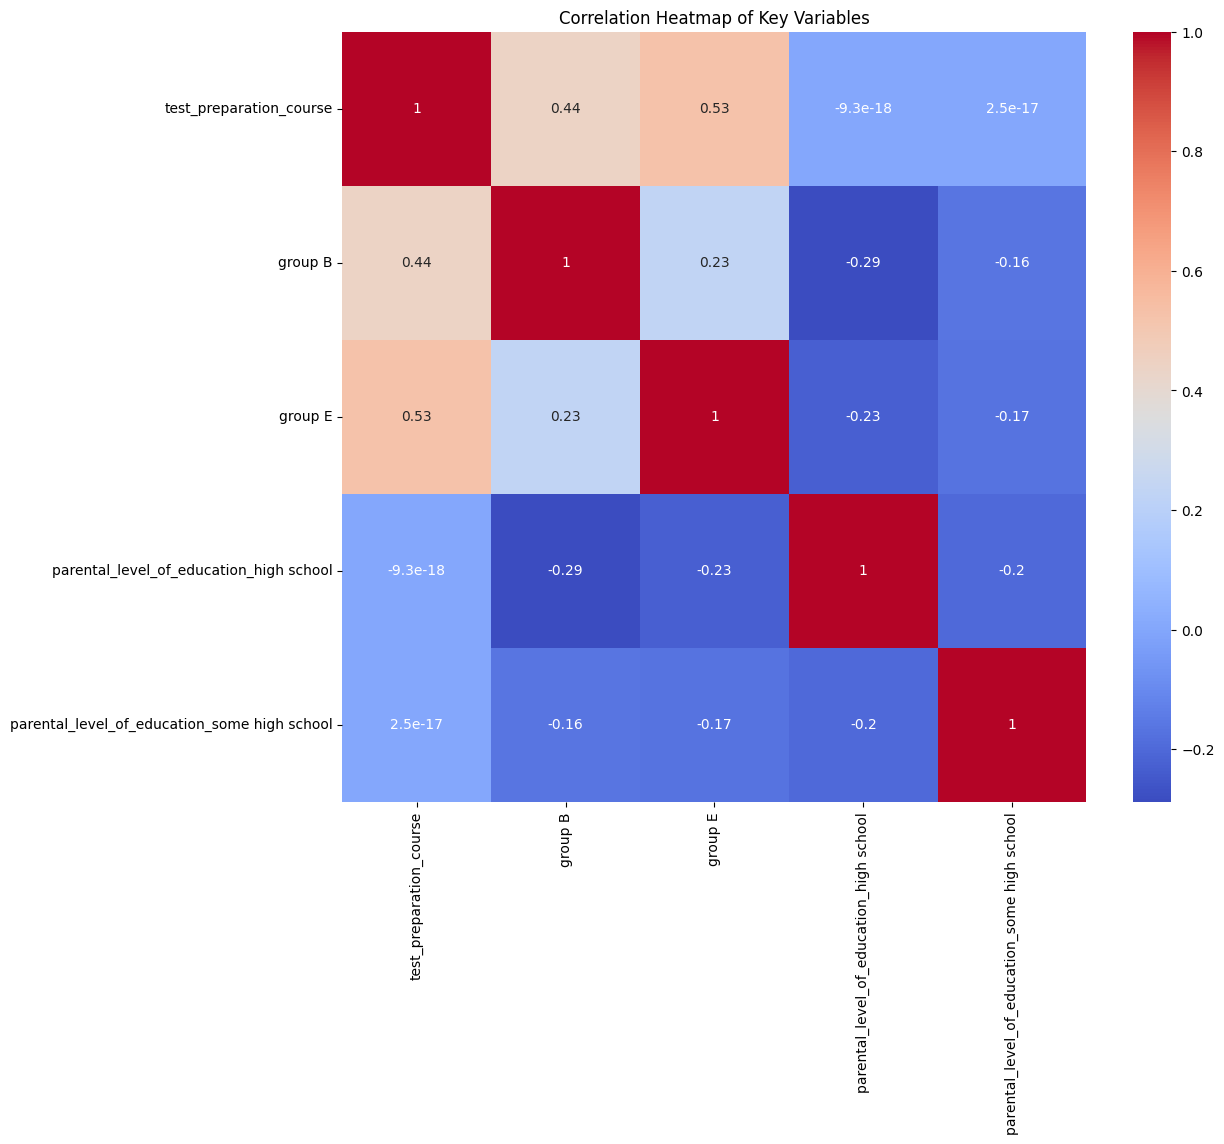

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Variables')
plt.show()

It is good that we can see that our variables are not too highly correlated, giving us room to investigate them.

# Bagging, Random Forest, and Boosting

In [ ]:
# Retraining the data after dropping the columns
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size = 0.4, random_state = 1)

In [ ]:
# Bagging
bagging_model = RandomForestRegressor(max_features = 3, random_state = 1)
bagging_model.fit(train_X, train_Y)
bagging_model_predict = bagging_model.predict(train_X)

# Random Forest
randomforest_model = RandomForestRegressor(max_features = 2, random_state = 1)
randomforest_model.fit(train_X, train_Y)
randomforest_model_predict = randomforest_model.predict(train_X)

# Boosting
boosting_model = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.01, random_state = 1)
boosting_model.fit(train_X, train_Y)
boosting_model_predict = boosting_model.predict(train_X)

In [ ]:
regressionSummary(train_Y, bagging_model_predict)

regressionSummary(train_Y, randomforest_model_predict)

regressionSummary(train_Y, boosting_model_predict)


Regression statistics

               Mean Error (ME) : -0.0157
Root Mean Squared Error (RMSE) : 0.1918
     Mean Absolute Error (MAE) : 0.1786

Regression statistics

               Mean Error (ME) : -0.0321
Root Mean Squared Error (RMSE) : 0.1960
     Mean Absolute Error (MAE) : 0.1864

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.0162
     Mean Absolute Error (MAE) : 0.0132


# Variable Importance

In [ ]:
Importance = pd.DataFrame({'Importance':boosting_model.feature_importances_*100}, \
                          index = X.columns)

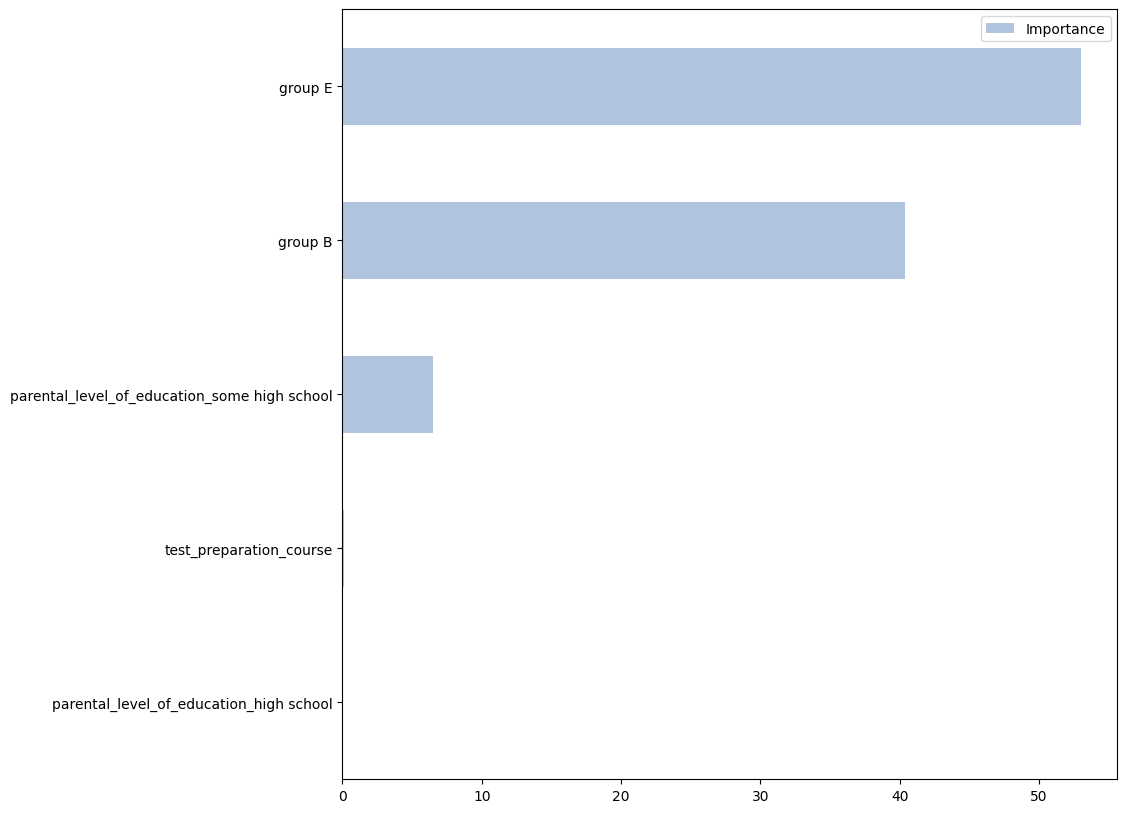

In [ ]:
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='lightsteelblue', )
plt.gcf().set_size_inches(10, 10)

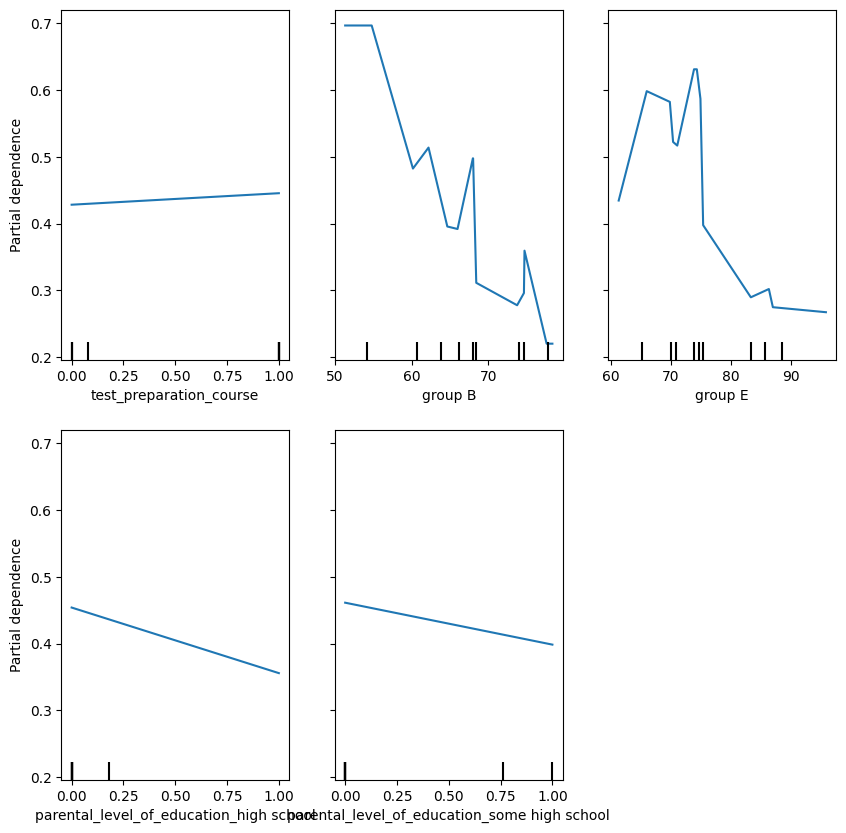

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = [0,1,2,3,4]
PartialDependenceDisplay.from_estimator(bagging_model, train_X, features)
plt.gcf().set_size_inches(10, 10)

# Linear Regression

In [ ]:
#got this line from gemini to help with an error since we have string data types
X = X.select_dtypes(include=['number'])
X = sm.add_constant(X)
model1 = sm.OLS(Y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gender   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1.343
Date:                Sat, 30 Nov 2024   Prob (F-statistic):              0.289
Time:                        18:03:46   Log-Likelihood:                -15.216
No. Observations:                  24   AIC:                             38.43
Df Residuals:                      20   BIC:                             43.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.0798      1.351      2.280      0.034       0.262       5.897
test_preparation_course     0.3113      0.259      1.201      0.244      -0.230       0.852
group B                    -0.0195      0.012     -1.591      0.127      -0.045       0.006
group E                    -0.0189      0.016     -1.218      0.238      -0.051       0.014
==============================================================================
Omnibus:                        6.792   Durbin-Watson:                   0.642
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                1.980
Skew:                          -0.193   Prob(JB):                        0.372
Kurtosis:                       1.647   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Heteroskedasticity

In [ ]:
residuals=results1.resid

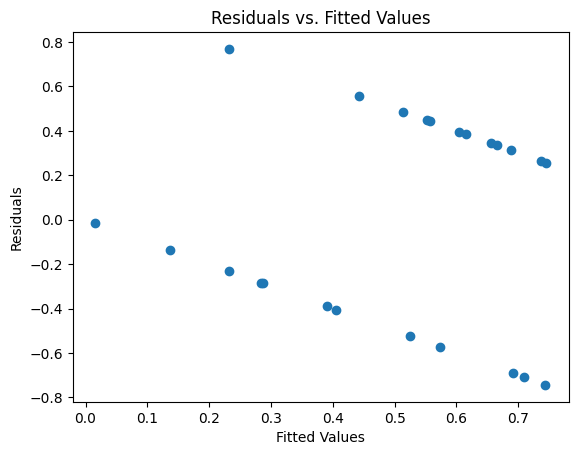

Breusch-Pagan test p-value: 0.26909874549515544


In [ ]:
plt.scatter(results1.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Breusch-Pagan test for Heteroscedasticity
_, p_value, _, _ = sms.het_breuschpagan(residuals, model1.exog)
print(f"Breusch-Pagan test p-value: {p_value}")

We have a p-value above 0.05 which means that we can conclude there is no heteroskedasticity present in our data.

### Impact of Test Preparation Course on Average Score by Gender

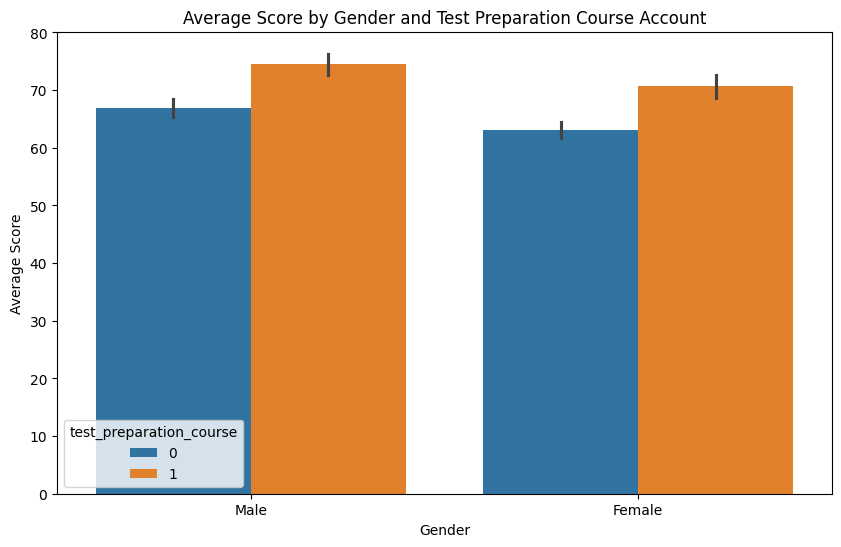

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='average_score', hue='test_preparation_course', data=df)
plt.title('Average Score by Gender and Test Preparation Course Account')
plt.xlabel('Gender')
plt.ylabel('Average Score')
#Add a label that makes 0= Male and 1= Female
plt.xticks([0, 1], ["Male", "Female"])
plt.show()

Based on this visual, it is evident that individuals of both genders achieve higher average scores when they participate in the test preparation course compared to those who do not.


### Impact of Parental Education Level on Average Score by Gender

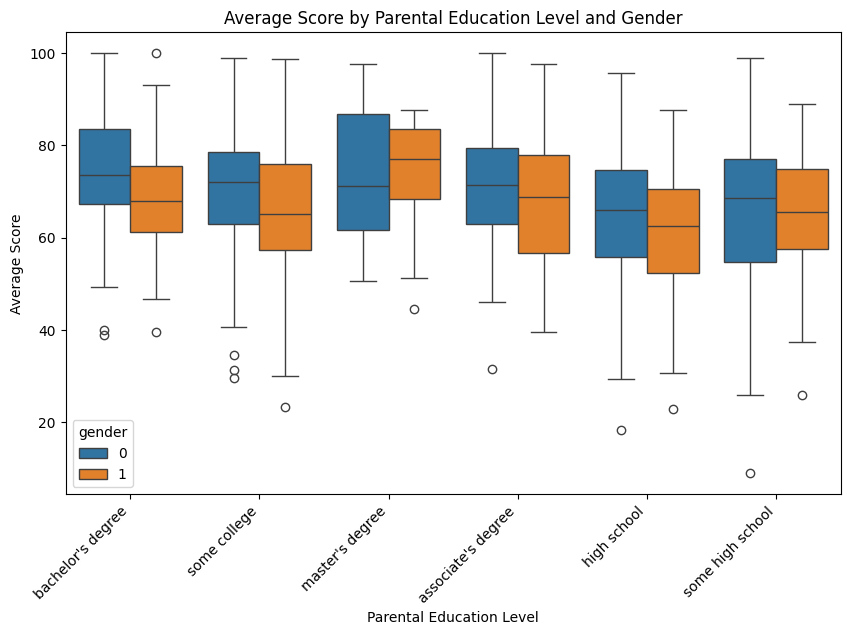

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_level_of_education', y='average_score', hue='gender', data=df)

plt.title('Average Score by Parental Education Level and Gender')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')



plt.show()

# Comparing Math, Reading, and Writing Scores by Gender

<ipython-input-52-b95f6b9420a4>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x="gender", y="score", hue="score_type", ci=None)


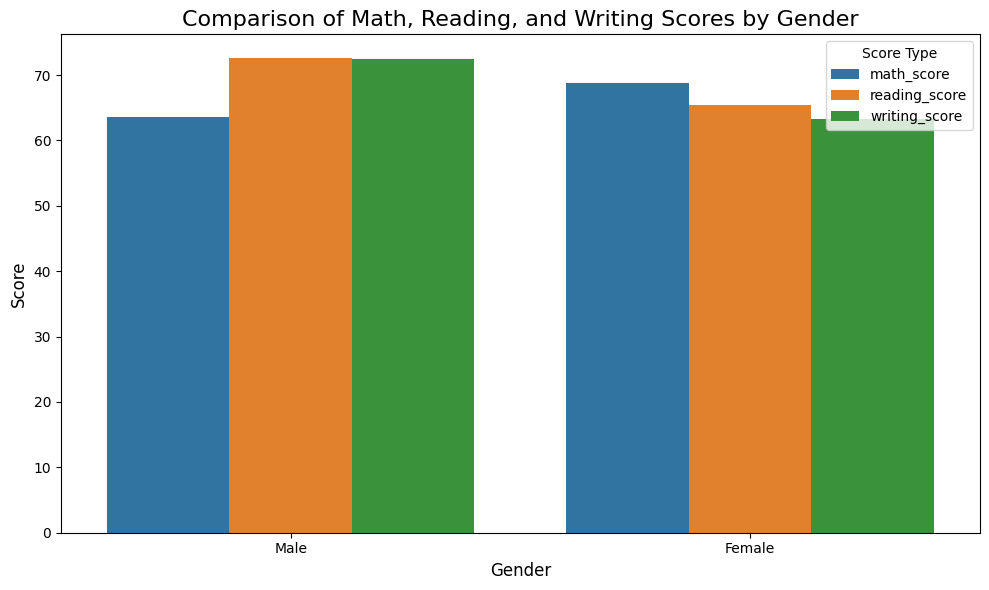

In [ ]:
# Melt the DataFrame for easier visualization
df_melted = df.melt(id_vars=["gender"], value_vars=["math_score", "reading_score", "writing_score"],
                    var_name="score_type", value_name="score")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="gender", y="score", hue="score_type", ci=None)

# Add titles and labels
plt.title("Comparison of Math, Reading, and Writing Scores by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Score Type")

#Add a label that makes 0= Male and 1= Female
plt.xticks([0, 1], ["Male", "Female"])

# Display the plot
plt.tight_layout()
plt.show()